In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("rwsi_data.csv")

**Numerical variables distribution.**


1. Counts against Different Numerical Columns for basic Understanding.





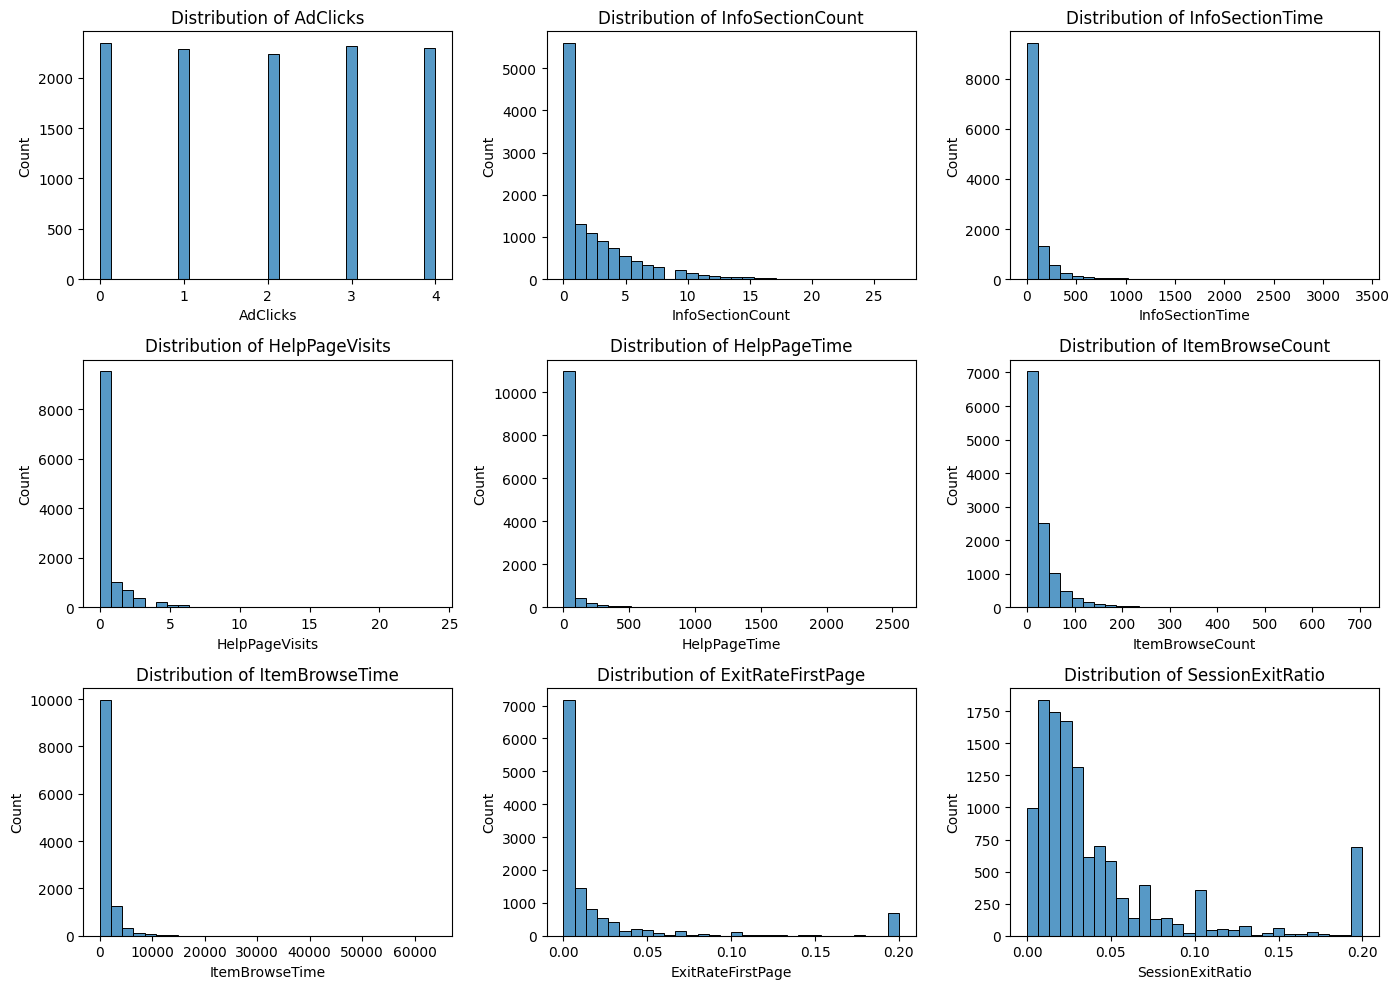

In [ ]:
plt.figure(figsize=(14, 10))
mapping = {'Yes': 1, 'No':0}
df['MonetaryConversion'] = df['MonetaryConversion'].map(mapping)
num_cols = df.select_dtypes(include=np.number).columns
for i, col in enumerate(num_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Categorical variables count plots.**
1. No Data present for January and April.
2. Chrome Users are Highest more than x2 or x3 as compared to others.

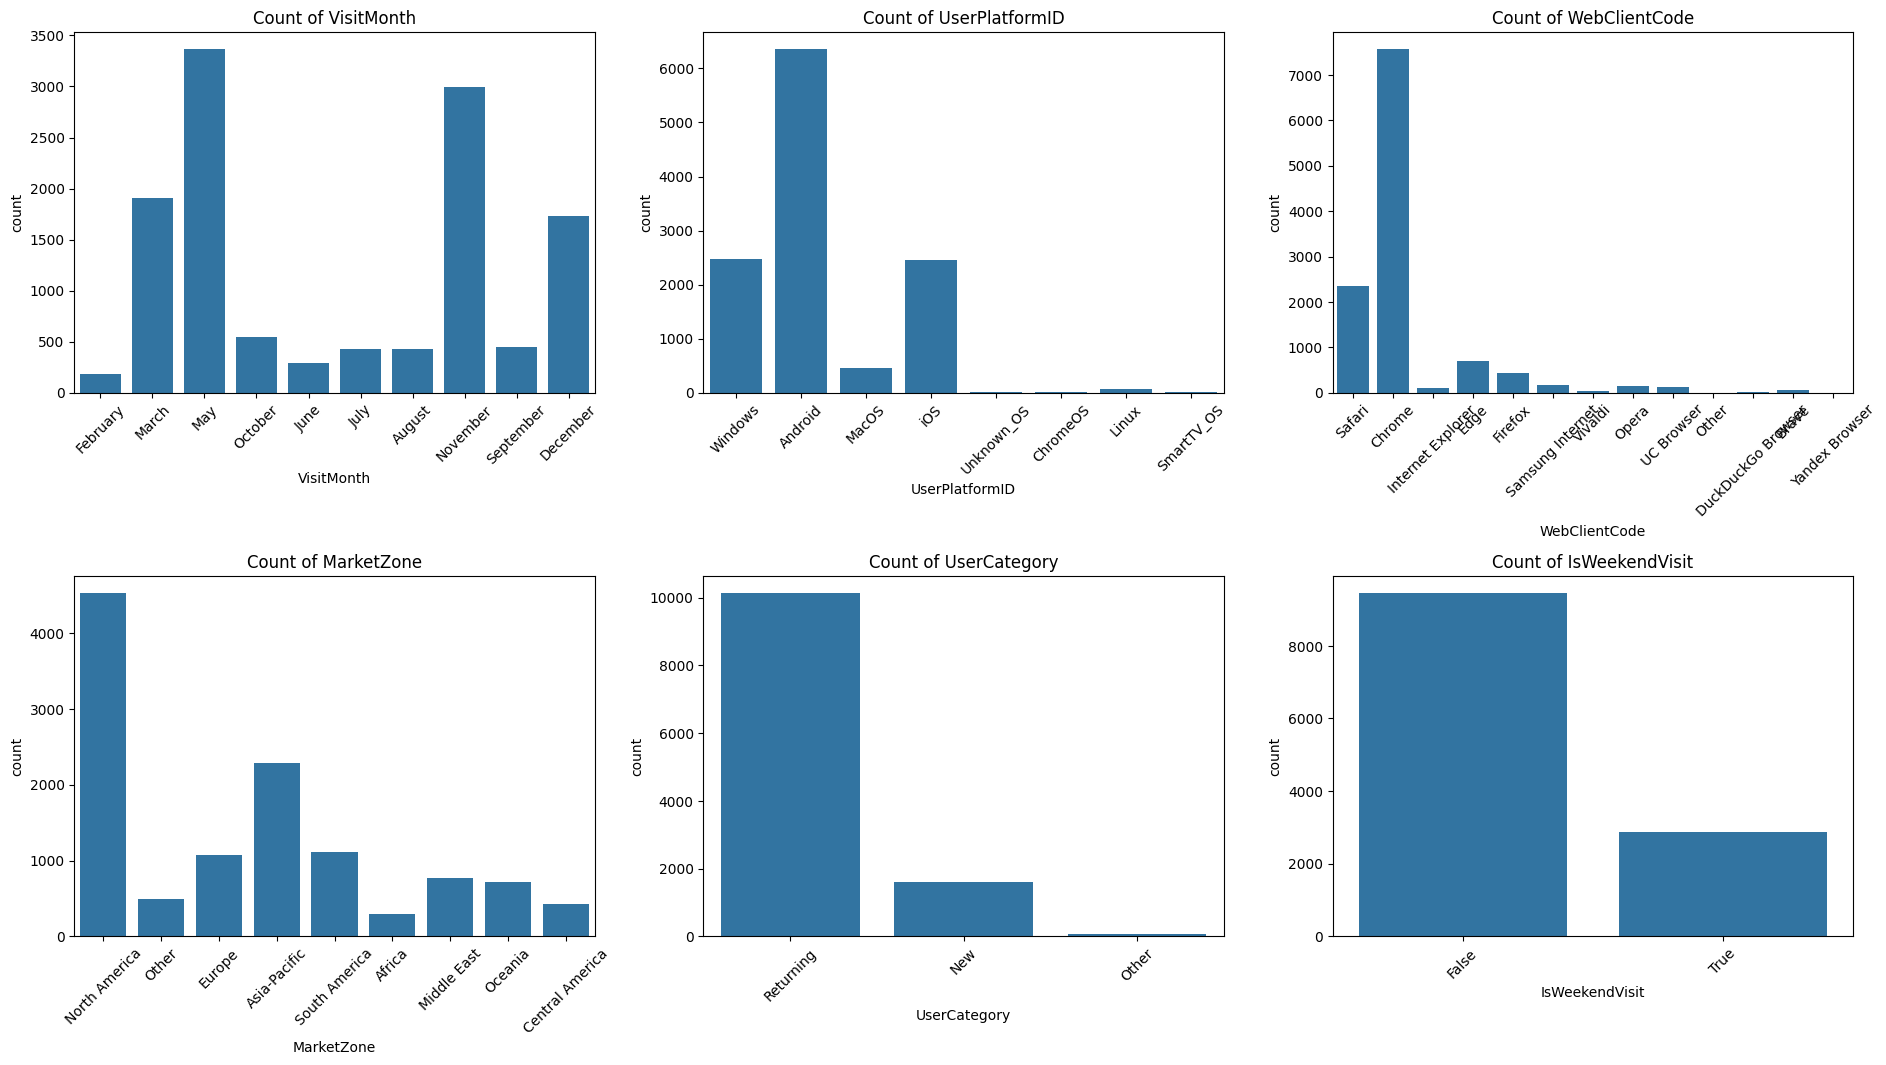

In [ ]:
plt.figure(figsize=(19, 15))
cat_cols = df.select_dtypes(exclude=np.number).columns
for i, col in enumerate(cat_cols[1:9], 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

**Distribution of Monetary Conversion**

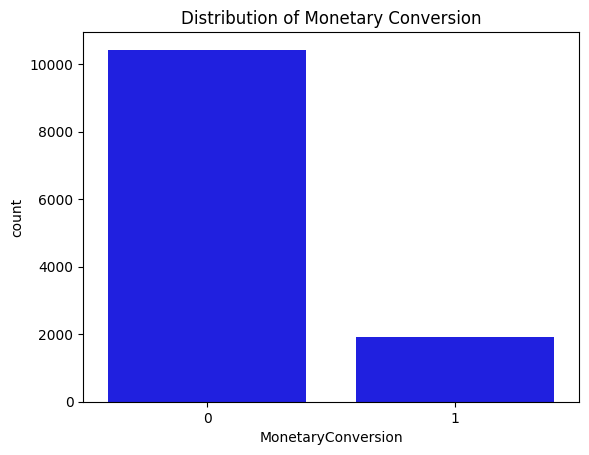

In [ ]:
df['MonetaryConversion'] = df['MonetaryConversion'].astype(int)

sns.countplot(x='MonetaryConversion', data=df, color='Blue')
plt.title('Distribution of Monetary Conversion')
plt.show()


**Correlation heatmap for numerical variables.**
1. PageEngagementScore has highly correlated with Target MonetaryConversion.

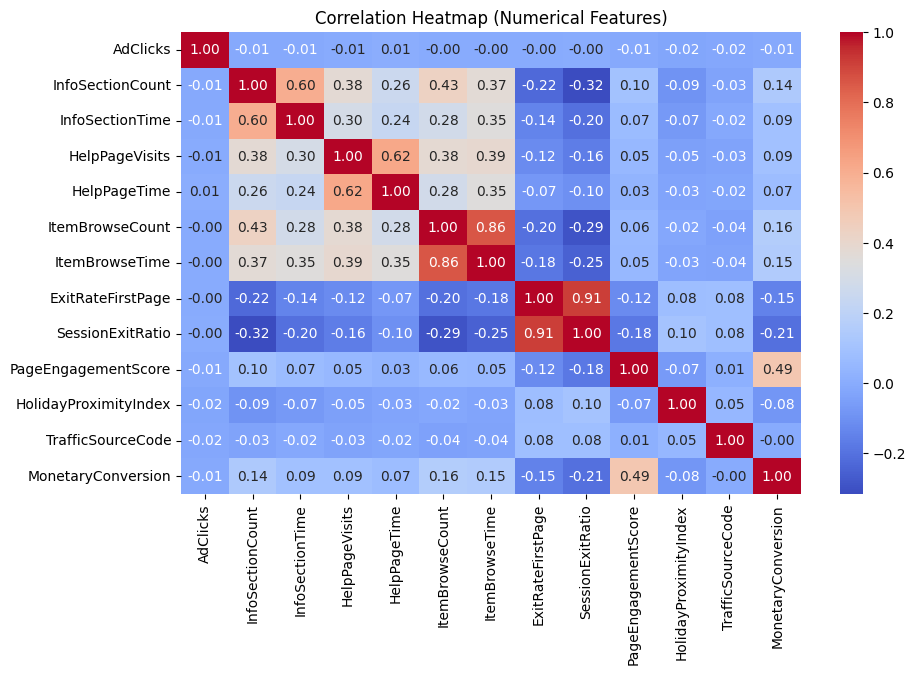

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

**Boxplots for conversion patterns**
1. Box represents Median.
2. The line inside Box represents median of Data.
3. IQR= Q3 - Q1 = middle 50% Data.
4. Round circles represents Outliers.



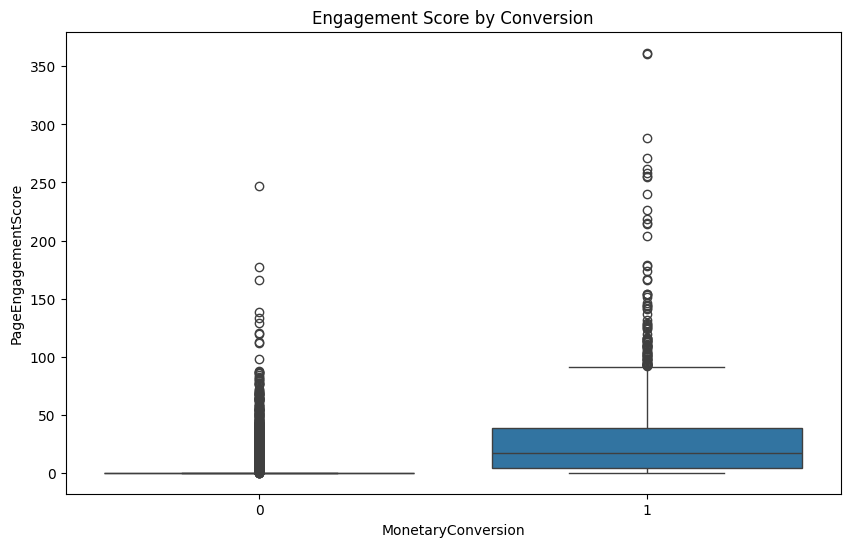

In [ ]:
if 'MonetaryConversion' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='MonetaryConversion', y='PageEngagementScore')
    plt.title("Engagement Score by Conversion")
    plt.show()

**Relationship between PageEngagementScore & ExitRateFirstPage on Device Type**

1. Low EngagementScore have Higher chances of Exit.
2. High EngagementScore have Lower chances of Exit.



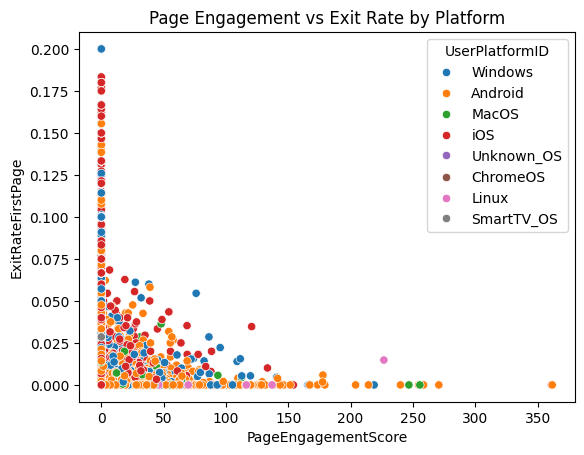

In [ ]:
sns.scatterplot(data=df, x='PageEngagementScore', y='ExitRateFirstPage', hue='UserPlatformID')
plt.title("Page Engagement vs Exit Rate by Platform")
plt.show()

**Average engagement by platform**


1. Linux and ChromeOs users have highest pageEngagementScore meaning they interact more on pages.
2. At the same time (Black Lines) Shows Variability Some Linux/ChromeOs have very high and low PageEngagementScore.
3. Windows, Android, ios have moderate PageEngagementScore and SmartTv, others have Lowest score.



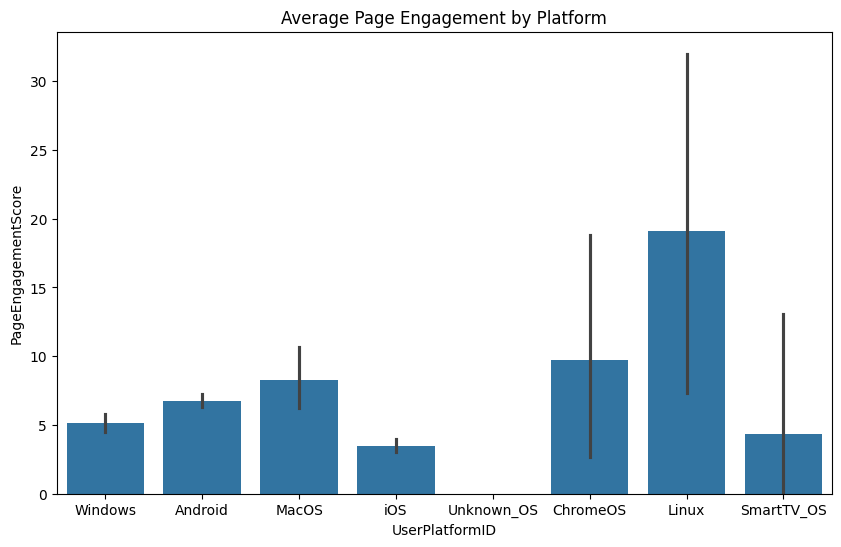

In [ ]:
if 'UserPlatformID' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='UserPlatformID', y='PageEngagementScore', estimator=np.mean)
    plt.title("Average Page Engagement by Platform")
    plt.show()

**Weekend vs Engagement**


1. The Median for both Boxplot is at same Height, so we can say user engagement is nearly identical whether its Weekdays or Weekends.
2. Outliers Present on both sides show very high engagement but they occur both on weekdays and weekends.
3. Representation: False- Weekday , True- Weekend


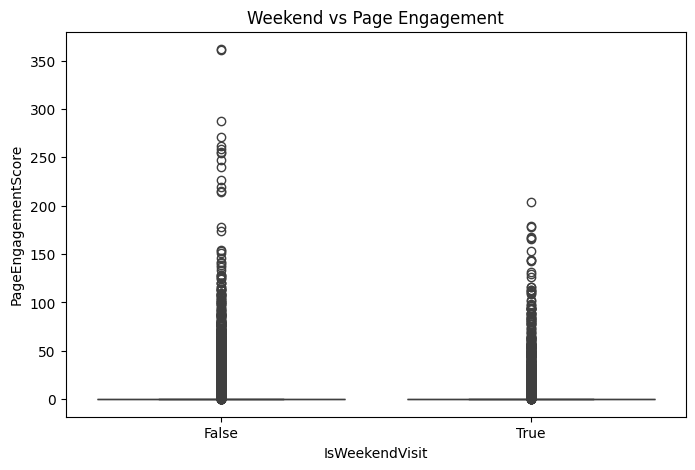

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='IsWeekendVisit', y='PageEngagementScore')
plt.title("Weekend vs Page Engagement")
plt.show()